In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
from matplotlib import gridspec
% matplotlib inline

In [2]:
nc_filename=glob.glob('*ptrc*.nc')
print("found *.nc file: \n{}".format(nc_filename))

found *.nc file: 
['GYRE_1y_00010101_00701226_ptrc_T.nc', 'r_GYRE_10y_00010101_00120727_ptrc_T.nc', 'r_GYRE_50y_00010101_00520528_ptrc_T.nc', 'r_1yr_GYRE_1m_00010101_00020227_ptrc_T.nc', 'GYRE_1y_00010101_01550322_ptrc_T.nc', 'r_Th_constant_GYRE_1m_00010101_00020227_ptrc_T.nc']


In [3]:
ptrc_T=nc.Dataset(nc_filename[0])
print ptrc_T.variables

OrderedDict([(u'nav_lon', <netCDF4.Variable object at 0x7f121538f348>), (u'nav_lat', <netCDF4.Variable object at 0x7f121538f3e0>), (u'deptht', <netCDF4.Variable object at 0x7f121538f478>), (u'depthw', <netCDF4.Variable object at 0x7f121538f510>), (u'depthv', <netCDF4.Variable object at 0x7f121538f5a8>), (u'depthu', <netCDF4.Variable object at 0x7f121538f640>), (u'time_counter', <netCDF4.Variable object at 0x7f121538f6d8>), (u'time_counter_bnds', <netCDF4.Variable object at 0x7f121538f770>), (u'TR_7', <netCDF4.Variable object at 0x7f121538f808>), (u'TR_8', <netCDF4.Variable object at 0x7f121538f8a0>), (u'TR_9', <netCDF4.Variable object at 0x7f121538f938>), (u'TR_10', <netCDF4.Variable object at 0x7f121538f9d0>), (u'DET', <netCDF4.Variable object at 0x7f121538fa68>), (u'ZOO', <netCDF4.Variable object at 0x7f121538fb00>), (u'vovecrtz', <netCDF4.Variable object at 0x7f121538fb98>), (u'vomecrty', <netCDF4.Variable object at 0x7f121538fc30>), (u'vozocrtx', <netCDF4.Variable object at 0x7f121

In [4]:
lat = ptrc_T.variables['nav_lat'][:]
lon = ptrc_T.variables['nav_lon'][:]
Dis_Pa = ptrc_T.variables['TR_7'][:]
Par_Pa = ptrc_T.variables['TR_9'][:]
Dis_Th = ptrc_T.variables['TR_8'][:]
Par_Th = ptrc_T.variables['TR_10'][:]
dep = ptrc_T.variables['deptht'][:]
print('Latitude {} ~ {}'.format(np.min(lat), np.max(lat)))
print('Longitude {} ~ {}'.format(np.min(lon), np.max(lon)))
print Dis_Pa.shape

Latitude 14.8450098038 ~ 49.8954620361
Longitude -85.6740493774 ~ -50.6235961914
(69, 31, 22, 32)


In [5]:
latlim=[10, 50]
lonlim=[-85, -48]
TR_7=np.ma.masked_where(Dis_Pa<=0, Dis_Pa)
TR_8=np.ma.masked_where(Dis_Th<= 0, Dis_Th)
TR_9=np.ma.masked_where(Par_Pa<= 0, Par_Pa)
TR_10=np.ma.masked_where(Par_Th<= 0, Par_Th)

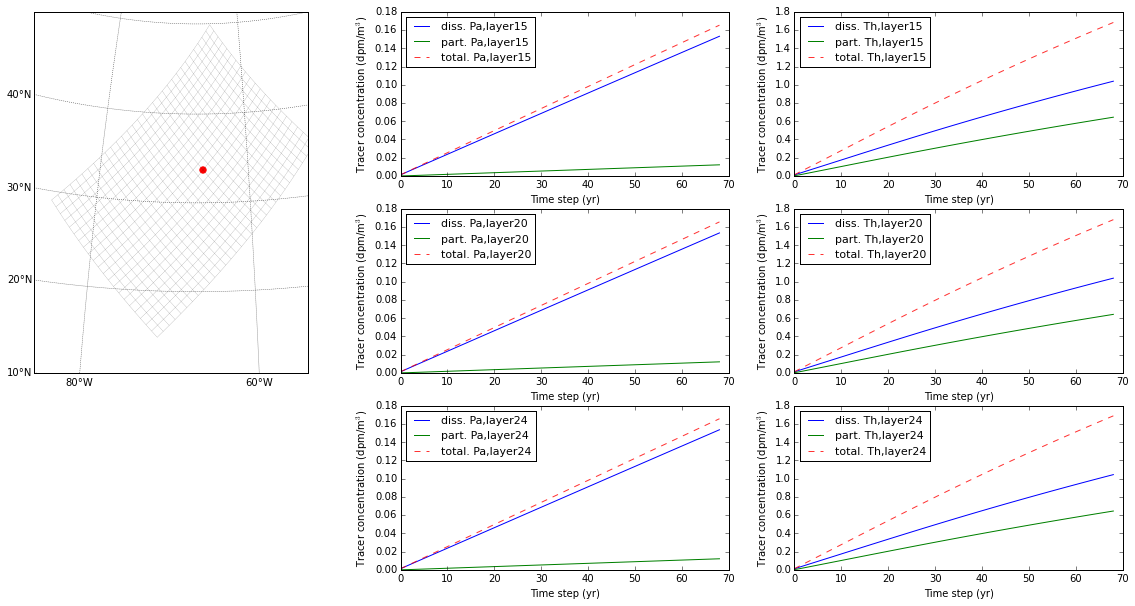

In [8]:
j=24;i=15;k=20
#ylim=[0,0.4];ylim2=[0,0.9]

fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(3, 3)
ax = fig.add_subplot(gs[0:2,0])

m=Basemap(projection='stere',\
            lat_1=30, lat_2=60,lat_0=(latlim[0]+latlim[1])/2, \
            lon_0=(lonlim[0]+lonlim[1])/2,\
            llcrnrlon=lonlim[0], llcrnrlat=latlim[0],\
            urcrnrlon=lonlim[1], urcrnrlat=latlim[1],\
            resolution='l')
m.drawparallels(np.arange(-90, 91,10),labels=[1,0,0,0], color = '0.25',linewidth= 0.5)
m.drawmeridians(np.arange(-180,180,20), labels=[1,0,0,1],color = '0.25',linewidth= 0.5)
x, y = m(lon, lat) 
plt.plot(x,y,x.T,y.T,color='k',linewidth=0.1)
#m.scatter(x[10,5],y[10,5],color='orange',s=40)
m.scatter(x[10,18],y[10,18],color='red',s=40)
#m.scatter(x_lon[141,138],y_lat[141,138],color='green',s=40)

ax = fig.add_subplot(gs[0,1])
plt.plot(TR_7[:,i,10,18],label=('diss. Pa,layer%s'%i))
plt.plot(TR_9[:,i,10,18],label=('part. Pa,layer%s'%i))
plt.plot(TR_7[:,i,10,18]+TR_9[:,i,10,18],linestyle='--',label=('total. Pa,layer%s'%i),alpha=0.8)
plt.xlabel('Time step (yr)')
plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
#plt.ylim(ylim)
plt.legend(loc=0,fontsize=11)

ax = fig.add_subplot(gs[0,2])      
plt.plot(TR_8[:,i,10,18],label=('diss. Th,layer%s'%i))
plt.plot(TR_10[:,i,10,18],label=('part. Th,layer%s'%i))
plt.plot(TR_8[:,i,10,18]+TR_10[:,i,10,18],linestyle='--',label=('total. Th,layer%s'%i),alpha=0.8)
plt.xlabel('Time step (yr)')
plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
#plt.ylim(ylim2)
plt.legend(loc=0,fontsize=11)

ax = fig.add_subplot(gs[1,1])
plt.plot(TR_7[:,k,10,18],label=('diss. Pa,layer%s'%k))
plt.plot(TR_9[:,k,10,18],label=('part. Pa,layer%s'%k))
plt.plot(TR_7[:,k,10,18]+TR_9[:,k,10,18],linestyle='--',label=('total. Pa,layer%s'%k),alpha=0.8)      
plt.xlabel('Time step (yr)')
plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
#plt.ylim(ylim)
plt.legend(loc=0,fontsize=11)

ax = fig.add_subplot(gs[1,2])
plt.plot(TR_8[:,k,10,18],label=('diss. Th,layer%s'%k))
plt.plot(TR_10[:,k,10,18],label=('part. Th,layer%s'%k))
plt.plot(TR_8[:,k,10,18]+TR_10[:,k,10,18],linestyle='--',label=('total. Th,layer%s'%k),alpha=0.8)      
plt.legend(loc=0,fontsize=11)
plt.xlabel('Time step (yr)')
plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
#plt.ylim(ylim2)

ax = fig.add_subplot(gs[2,1])
plt.plot(TR_7[:,j,10,18],label=('diss. Pa,layer%s'%j))
plt.plot(TR_9[:,j,10,18],label=('part. Pa,layer%s'%j))
plt.plot(TR_7[:,j,10,18]+TR_9[:,j,10,18],linestyle='--',label=('total. Pa,layer%s'%j),alpha=0.8)
plt.xlabel('Time step (yr)')
plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
#plt.ylim(ylim)
plt.legend(loc=0,fontsize=11)

ax = fig.add_subplot(gs[2,2])
plt.plot(TR_8[:,j,10,18],label=('diss. Th,layer%s'%j))
plt.plot(TR_10[:,j,10,18],label=('part. Th,layer%s'%j))
plt.plot(TR_8[:,j,10,18]+TR_10[:,j,10,18],linestyle='--',label=('total. Th,layer%s'%j),alpha=0.8)
plt.legend(loc=0,fontsize=11)
plt.xlabel('Time step (yr)')
plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
#plt.ylim(ylim2)

plt.show()

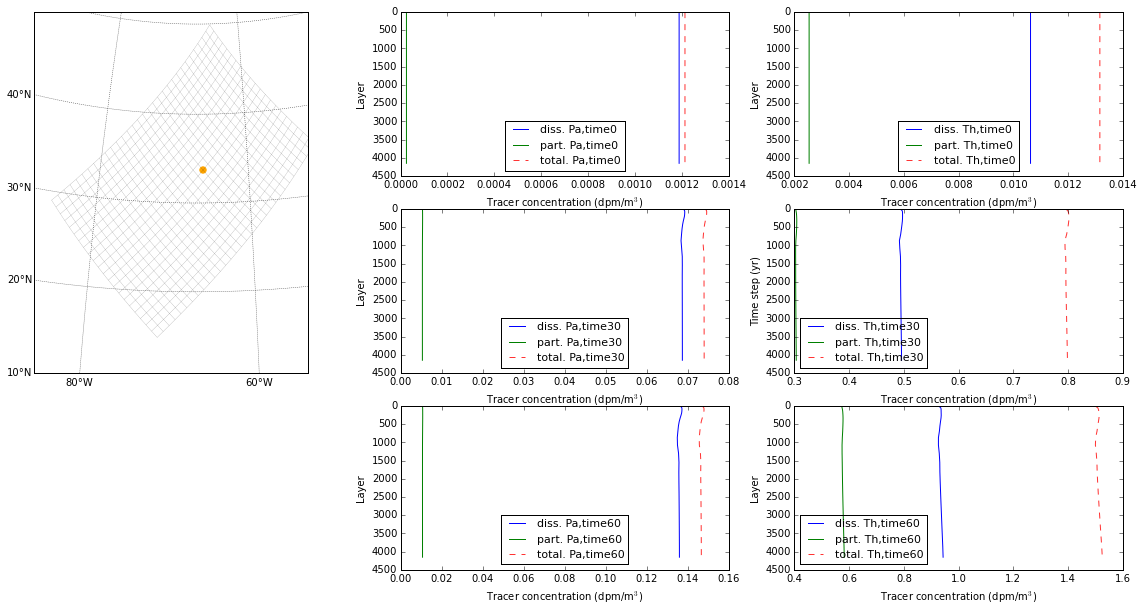

In [10]:
j=60;i=0;k=30 #i=15
#ylim=[0,0.4];ylim2=[0,0.9]

fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(3, 3)
ax = fig.add_subplot(gs[0:2,0])

m=Basemap(projection='stere',\
            lat_1=30, lat_2=60,lat_0=(latlim[0]+latlim[1])/2, \
            lon_0=(lonlim[0]+lonlim[1])/2,\
            llcrnrlon=lonlim[0], llcrnrlat=latlim[0],\
            urcrnrlon=lonlim[1], urcrnrlat=latlim[1],\
            resolution='l')
m.drawparallels(np.arange(-90, 91,10),labels=[1,0,0,0], color = '0.25',linewidth= 0.5)
m.drawmeridians(np.arange(-180,180,20), labels=[1,0,0,1],color = '0.25',linewidth= 0.5)
x, y = m(lon, lat) 
plt.plot(x,y,x.T,y.T,color='k',linewidth=0.1)
m.scatter(x[10,18],y[10,18],color='orange',s=40)
#m.scatter(x[10,18],y[10,18],color='red',s=40)
#m.scatter(x_lon[141,138],y_lat[141,138],color='green',s=40)

ax = fig.add_subplot(gs[0,1])
plt.plot(TR_7[i,:,10,18],dep,label=('diss. Pa,time%s'%i))
plt.plot(TR_9[i,:,10,18],dep,label=('part. Pa,time%s'%i))
plt.plot(TR_7[i,:,10,18]+TR_9[i,:,10,18],dep,linestyle='--',label=('total. Pa,time%s'%i),alpha=0.8)
plt.ylabel('Layer')
plt.xlabel('Tracer concentration (dpm/m$^{3}$)')
#plt.ylim(ylim)
plt.legend(loc=0,fontsize=11)
plt.gca().invert_yaxis() 

ax = fig.add_subplot(gs[0,2])      
plt.plot(TR_8[i,:,10,18],dep,label=('diss. Th,time%s'%i))
plt.plot(TR_10[i,:,10,18],dep,label=('part. Th,time%s'%i))
plt.plot(TR_8[i,:,10,18]+TR_10[i,:,10,18],dep,linestyle='--',label=('total. Th,time%s'%i),alpha=0.8)
plt.ylabel('Layer')
plt.xlabel('Tracer concentration (dpm/m$^{3}$)')
#plt.ylim(ylim2)
plt.legend(loc=0,fontsize=11)
plt.gca().invert_yaxis() 

ax = fig.add_subplot(gs[1,1])
plt.plot(TR_7[k,:,10,18],dep,label=('diss. Pa,time%s'%k))
plt.plot(TR_9[k,:,10,18],dep,label=('part. Pa,time%s'%k))
plt.plot(TR_7[k,:,10,18]+TR_9[k,:,10,18],dep,linestyle='--',label=('total. Pa,time%s'%k),alpha=0.8)      
plt.ylabel('Layer')
plt.xlabel('Tracer concentration (dpm/m$^{3}$)')
plt.gca().invert_yaxis() 
#plt.ylim(ylim)
plt.legend(loc=0,fontsize=11)

ax = fig.add_subplot(gs[1,2])
plt.plot(TR_8[k,:,10,18],dep,label=('diss. Th,time%s'%k))
plt.plot(TR_10[k,:,10,18],dep,label=('part. Th,time%s'%k))
plt.plot(TR_8[k,:,10,18]+TR_10[k,:,10,18],dep,linestyle='--',label=('total. Th,time%s'%k),alpha=0.8)      
plt.legend(loc=0,fontsize=11)
plt.ylabel('Time step (yr)')
plt.xlabel('Tracer concentration (dpm/m$^{3}$)')
plt.gca().invert_yaxis() 
#plt.ylim(ylim2)

ax = fig.add_subplot(gs[2,1])
plt.plot(TR_7[j,:,10,18],dep,label=('diss. Pa,time%s'%j))
plt.plot(TR_9[j,:,10,18],dep,label=('part. Pa,time%s'%j))
plt.plot(TR_7[j,:,10,18]+TR_9[j,:,10,18],dep,linestyle='--',label=('total. Pa,time%s'%j),alpha=0.8)
plt.ylabel('Layer')
plt.xlabel('Tracer concentration (dpm/m$^{3}$)')
#plt.ylim(ylim)
plt.gca().invert_yaxis() 
plt.legend(loc=0,fontsize=11)

ax = fig.add_subplot(gs[2,2])
plt.plot(TR_8[j,:,10,18],dep,label=('diss. Th,time%s'%j))
plt.plot(TR_10[j,:,10,18],dep,label=('part. Th,time%s'%j))
plt.plot(TR_8[j,:,10,18]+TR_10[j,:,10,18],dep,linestyle='--',label=('total. Th,time%s'%j),alpha=0.8)
plt.legend(loc=0,fontsize=11)
plt.ylabel('Layer')
plt.xlabel('Tracer concentration (dpm/m$^{3}$)')
plt.gca().invert_yaxis() 
#plt.ylim(ylim2)

plt.show()

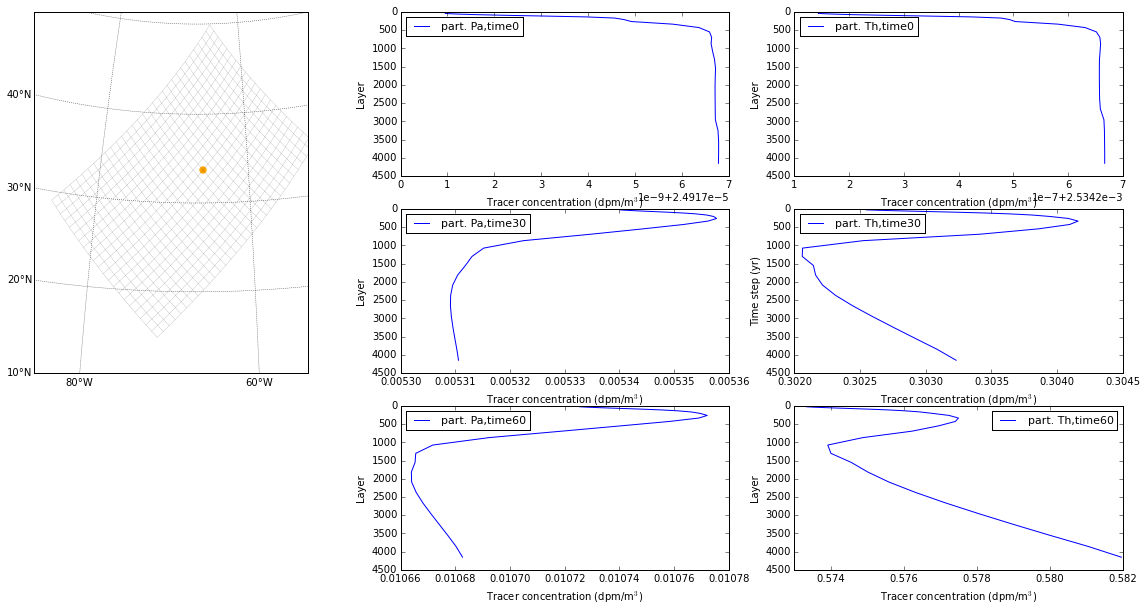

In [9]:
j=60;i=0;k=30 #i=15
#ylim=[0,0.4];ylim2=[0,0.9]

fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(3, 3)
ax = fig.add_subplot(gs[0:2,0])

m=Basemap(projection='stere',\
            lat_1=30, lat_2=60,lat_0=(latlim[0]+latlim[1])/2, \
            lon_0=(lonlim[0]+lonlim[1])/2,\
            llcrnrlon=lonlim[0], llcrnrlat=latlim[0],\
            urcrnrlon=lonlim[1], urcrnrlat=latlim[1],\
            resolution='l')
m.drawparallels(np.arange(-90, 91,10),labels=[1,0,0,0], color = '0.25',linewidth= 0.5)
m.drawmeridians(np.arange(-180,180,20), labels=[1,0,0,1],color = '0.25',linewidth= 0.5)
x, y = m(lon, lat) 
plt.plot(x,y,x.T,y.T,color='k',linewidth=0.1)
m.scatter(x[10,18],y[10,18],color='orange',s=40)
#m.scatter(x[10,18],y[10,18],color='red',s=40)
#m.scatter(x_lon[141,138],y_lat[141,138],color='green',s=40)

ax = fig.add_subplot(gs[0,1])
#plt.plot(TR_7[i,:,10,18],dep,label=('diss. Pa,time%s'%i))
plt.plot(TR_9[i,:,10,18],dep,label=('part. Pa,time%s'%i))
#plt.plot(TR_7[i,:,10,18]+TR_9[i,:,10,18],dep,linestyle='--',label=('total. Pa,time%s'%i),alpha=0.8)
plt.ylabel('Layer')
plt.xlabel('Tracer concentration (dpm/m$^{3}$)')
#plt.ylim(ylim)
plt.legend(loc=0,fontsize=11)
plt.gca().invert_yaxis() 

ax = fig.add_subplot(gs[0,2])      
#plt.plot(TR_8[i,:,10,18],dep,label=('diss. Th,time%s'%i))
plt.plot(TR_10[i,:,10,18],dep,label=('part. Th,time%s'%i))
#plt.plot(TR_8[i,:,10,18]+TR_10[i,:,10,18],dep,linestyle='--',label=('total. Th,time%s'%i),alpha=0.8)
plt.ylabel('Layer')
plt.xlabel('Tracer concentration (dpm/m$^{3}$)')
#plt.ylim(ylim2)
plt.legend(loc=0,fontsize=11)
plt.gca().invert_yaxis() 

ax = fig.add_subplot(gs[1,1])
#plt.plot(TR_7[k,:,10,18],dep,label=('diss. Pa,time%s'%k))
plt.plot(TR_9[k,:,10,18],dep,label=('part. Pa,time%s'%k))
#plt.plot(TR_7[k,:,10,18]+TR_9[k,:,10,18],dep,linestyle='--',label=('total. Pa,time%s'%k),alpha=0.8)      
plt.ylabel('Layer')
plt.xlabel('Tracer concentration (dpm/m$^{3}$)')
plt.gca().invert_yaxis() 
#plt.ylim(ylim)
plt.legend(loc=0,fontsize=11)

ax = fig.add_subplot(gs[1,2])
#plt.plot(TR_8[k,:,10,18],dep,label=('diss. Th,time%s'%k))
plt.plot(TR_10[k,:,10,18],dep,label=('part. Th,time%s'%k))
#plt.plot(TR_8[k,:,10,18]+TR_10[k,:,10,18],dep,linestyle='--',label=('total. Th,time%s'%k),alpha=0.8)      
plt.legend(loc=0,fontsize=11)
plt.ylabel('Time step (yr)')
plt.xlabel('Tracer concentration (dpm/m$^{3}$)')
plt.gca().invert_yaxis() 
#plt.ylim(ylim2)

ax = fig.add_subplot(gs[2,1])
#plt.plot(TR_7[j,:,10,18],dep,label=('diss. Pa,time%s'%j))
plt.plot(TR_9[j,:,10,18],dep,label=('part. Pa,time%s'%j))
#plt.plot(TR_7[j,:,10,18]+TR_9[j,:,10,18],dep,linestyle='--',label=('total. Pa,time%s'%j),alpha=0.8)
plt.ylabel('Layer')
plt.xlabel('Tracer concentration (dpm/m$^{3}$)')
#plt.ylim(ylim)
plt.gca().invert_yaxis() 
plt.legend(loc=0,fontsize=11)

ax = fig.add_subplot(gs[2,2])
#plt.plot(TR_8[j,:,10,18],dep,label=('diss. Th,time%s'%j))
plt.plot(TR_10[j,:,10,18],dep,label=('part. Th,time%s'%j))
#plt.plot(TR_8[j,:,10,18]+TR_10[j,:,10,18],dep,linestyle='--',label=('total. Th,time%s'%j),alpha=0.8)
plt.legend(loc=0,fontsize=11)
plt.ylabel('Layer')
plt.xlabel('Tracer concentration (dpm/m$^{3}$)')
plt.gca().invert_yaxis() 
#plt.ylim(ylim2)

plt.show()